### Intro
Mivel egy kép többet ér ezer szónál, a diagramok és grafikonok nagyon hatékonyak lehetnek az adatok egyértelmű leírásának kommunikálásában, különösen akkor, ha az eredményeket közönségnek tárják fel, vagy megosztják az adatokat más adatkutatókkal.
<img src = "lab-cover.png">

Ebben a laborban elmerülünk a pandákkal való adatvizualizáció alapjaiban.

     Nem magyarázzuk el részletesen az egyes diagramtípusok alapjait, csak megtanuljuk, hogyan kell elkészíteni őket és alapvető paramétereit

#### A plot metódus
A pandák könyvtára nemcsak a hatékony adatelemzés lehetővé tétele miatt vált népszerűvé, hanem a praktikus előre elkészített ábrázolási módszerei miatt is. Érdekes azonban, hogy a panda ábrázolási módszerek csak kényelmes burkolók a meglévő matplotlib hívások körül.

Ez azt jelenti, hogy a pandák Series és DataFrame objektumain a plot() metódus a matplotlib plot() metódusa körüli wrapper.
Hogyan készíthetem el az első cselekményemet?

Ebben az esetben néhány véletlenszerű adatot generálunk az első alapfigurák elkészítése előtt. Ezután hozzáadjuk a véletlenszerű adatokat egy panda sorozathoz.

     A panda idősor egy olyan adatstruktúra a Python panda könyvtárban, amely időalapú formátumban tárolja és kezeli az adatokat. Ez egy speciális típusú adatkeret, amelyet az időalapú adatokkal való munkára optimalizáltak. Hatékony és rugalmas módot biztosít az időalapú adatok manipulálására és elemzésére.

Látni fogjuk panda sorozatunkat, amely dátumokat és értékeket tartalmaz:


In [2]:
import pandas as pd
import numpy as np

ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.head()


2000-01-01   -0.898075
2000-01-02   -2.360978
2000-01-03   -3.389342
2000-01-04   -2.407199
2000-01-05   -0.855246
Freq: D, dtype: float64

Az adatok készenléte után a plot() metódussal létrehozhatjuk első plotunkat:

<Axes: >

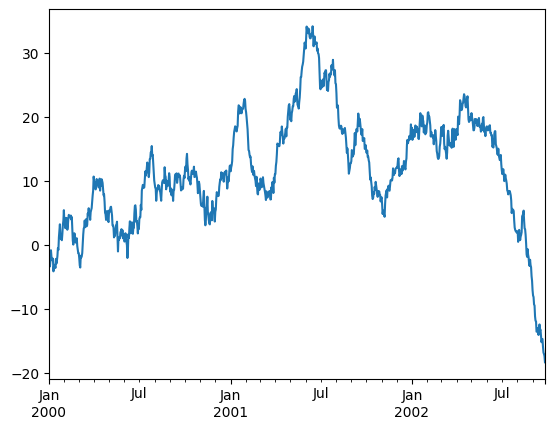

In [15]:
ts.plot()

Mint látható, az alapértelmezett diagram egy vonaldiagram. Ez a diagram az x tengely minden dátumát és az y tengely értékeit használja a vonaldiagram létrehozásához.

Ugyanezt megtehetjük, ha van DataFrame-ünk. Ezenkívül a DataFrames-en a plot() metódus kényelmes módja az összes oszlop egyidejű ábrázolásának:

<Axes: >

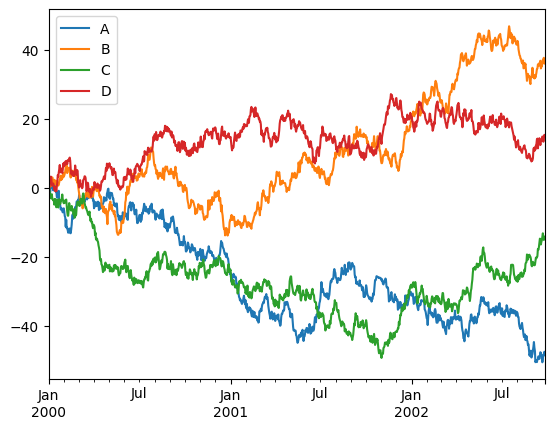

In [14]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD'))

df = df.cumsum()

df.plot()


#### Business sales data
A Pandák könnyedén beolvashatnak adatokat különböző adatforrásokból, például CSV-, JSON-, XML- vagy akár Excel-fájlokból.

Olvassuk be az adatokat a business-data.csv fájlból, és használjuk fel más típusú ábrák ábrázolására.

In [4]:
sales_df = pd.read_csv(r'..\..\source\business-sales.csv')


Mielőtt folytatná, nézzen meg néhány sort az adatokból, és használja az információkat és leírást az adatkészlet oszloptípusainak és értékeinek elemzéséhez.


In [5]:
sales_df.head()


,division,level of education,training level,work experience,salary,sales
0,computer software,some college,3,8,128607,490767
1,office supplies,associate's degree,1,9,103089,438965
2,office supplies,high school,0,7,70028,233196
3,office supplies,associate's degree,3,6,103236,432818
4,peripherals,some college,3,7,96879,468789


In [6]:
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            100 non-null    object
 1   level of education  100 non-null    object
 2   training level      100 non-null    int64 
 3   work experience     100 non-null    int64 
 4   salary              100 non-null    int64 
 5   sales               100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


Láthatjuk, hogy 6 különböző oszlopunk van, amelyek tartalmazzák a felosztást, az iskolai végzettséget, a képzési szintet, a munkatapasztalatot, a fizetést és az értékesítést.

Az első két oszlop kategorikus adatokat, míg a másik négy numerikus adatokat tartalmaz.

     Az oszlopok alapvető leíró statisztikáit is elemezheti a description() metódussal.

#### Plot típusok, 1 rész
Amikor paraméter nélkül használtuk a plot()-t, akkor egy vonaldiagramot kaptunk, de nagyon sokféle plot létrehozására használható.

A df.plot használatával mindig elérheti a dokumentációt, és megtekinthet néhány gyakran használt rajztípust?

Az ábrázolási módszerek az alapértelmezett vonalábrázoláson kívül néhány nyomtatási stílust tesznek lehetővé. Ezek a módszerek megadhatók a plot() típusú kulcsszó argumentumaként, és a következőket tartalmazzák:

     „bar” vagy „barh” bár telkekre
     „hist” a hisztogramhoz
     „box” a boxplot számára
     „kde” vagy „sűrűség” a sűrűségábrákhoz
     „terület” területtelkeknél
     ’szórás’ szórványterületekre
     „hexbin” a hatszögletű ládákhoz
     „pite” a tortatáblákhoz

Tehát próbáljunk meg néhányat közülük.

#### Oszlopdiagram

Ahogy korábban láttuk, a plot() metódussal is létrehozhatunk plotokat. Ebben az esetben, mivel oszlopdiagramot szeretnénk létrehozni, egy egyéni paramétert kell használnunk: kind.

Ezt a paramétert átadhatjuk a plot metódusnak a kimeneti plot testreszabásához.

Először is létrehozunk egy új division_values változót, amely tartalmazza az egyes osztásoszlopértékek számát a value_counts() segítségével. A kimenet egy sorozat lesz, így ott közvetlenül használhatjuk a plot() metódust:


<Axes: xlabel='division'>

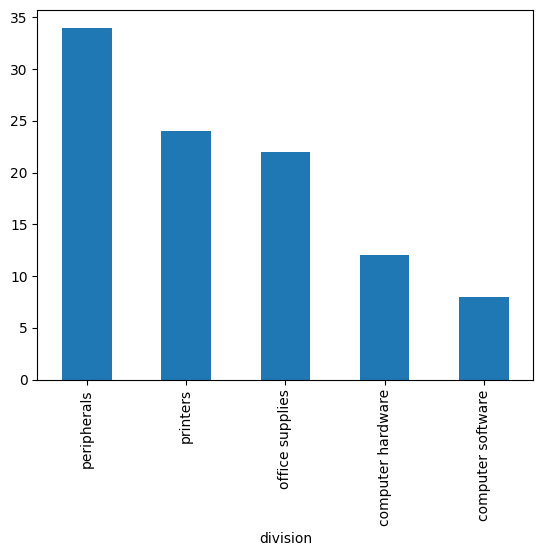

In [7]:
division_values = sales_df['division'].value_counts()

division_values.plot(kind="bar")


<Axes: xlabel='division'>

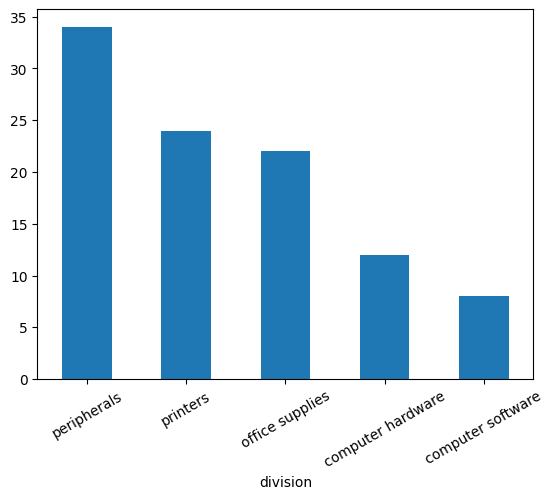

In [8]:
division_values.plot(kind="bar", rot=30)

Amint látható, a kind="bar" paramétert használtuk annak meghatározására, hogy oszlopdiagramot szeretnénk kimenetként.

Mint látható, az X-tengelyen lévő címkék alapértelmezett pozíciója függőleges. Ezt a tájolást a rot paraméterrel módosíthatjuk.


A cselekmény színezése egy másik dolog, amit érdemes megtenni. A plot() metódusnak is van egy színparamétere a sávok színének megváltoztatásához:


<Axes: xlabel='division'>

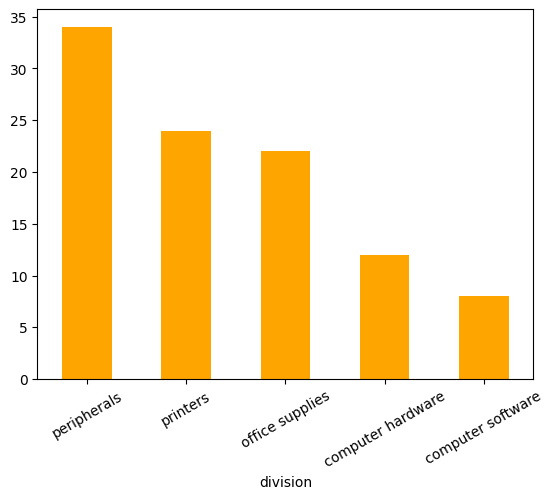

In [9]:
division_values.plot(kind="bar",
                     rot=30,
                     color="orange")


<Axes: xlabel='division'>

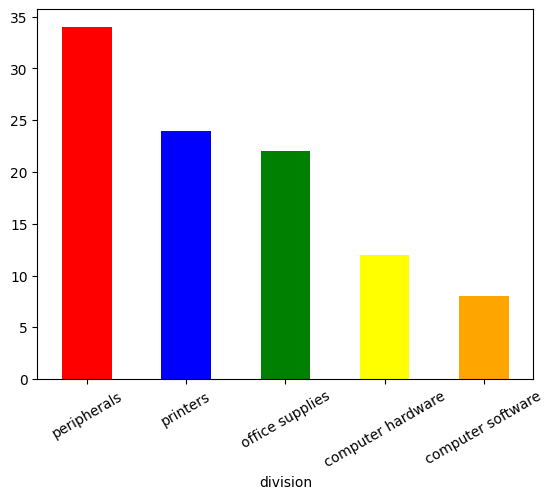

In [10]:
division_values.plot(kind="bar",
                     rot=30,
                     color=["red", "blue", "green", "yellow", "orange"])


Mi van, ha vízszintesen akarjuk elhelyezni a rudakat? Ezt a barh típusú diagram használatával érhetjük el:

<Axes: ylabel='division'>

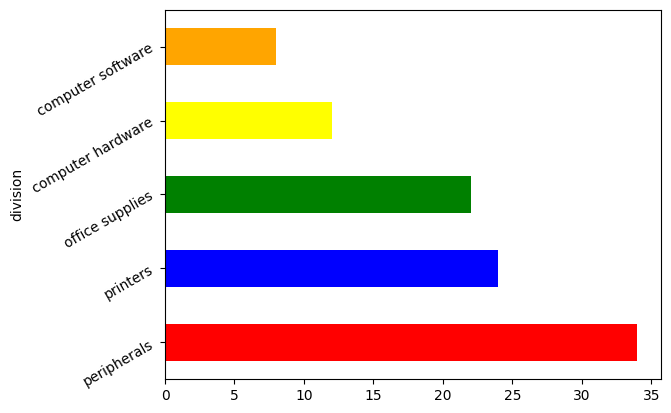

In [11]:
division_values.plot(kind="barh",
                     rot=30,
                     color=["red", "blue", "green", "yellow", "orange"])

Most létrehozunk egy sales_per_division DataFrame-et, amely tartalmazza az értékesítések divíziónkénti átlagát, és hozzáadunk egy új oszlopot egy szimulált értékesítési értékkel a következő évre:

In [17]:
sales_per_division = sales_df[["division", "sales"]].groupby("division").mean().reset_index()

sales_per_division["next_year_sales"] = sales_per_division["sales"] * 1.3


A DataFrame segítségével létrehozhatunk egy oszlopdiagramot, amely megadja az x és y értékeket:

<Axes: xlabel='division'>

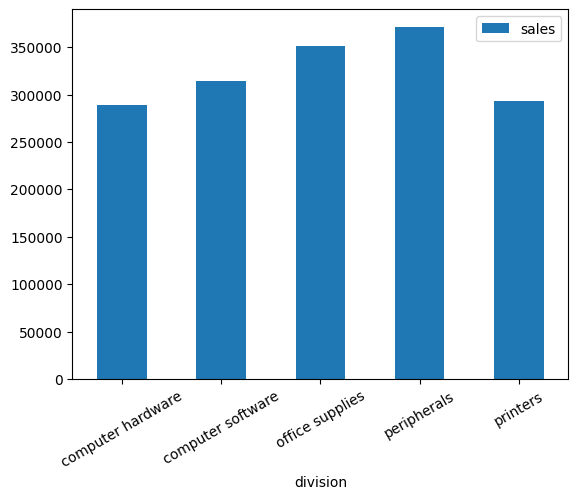

In [18]:
sales_per_division.plot(kind="bar",
                        x="division",
                        y="sales",
                        rot=30)


Tegyük fel, hogy egyszerre szeretnénk megjeleníteni az eladásokat és a következő_év_értékesítést is, ezt úgy érhetjük el, hogy átadjuk a DataFrame-ünk oszlopainak listáját. Most osztásonként két sávot fogunk látni egy helyett:

<Axes: xlabel='division'>

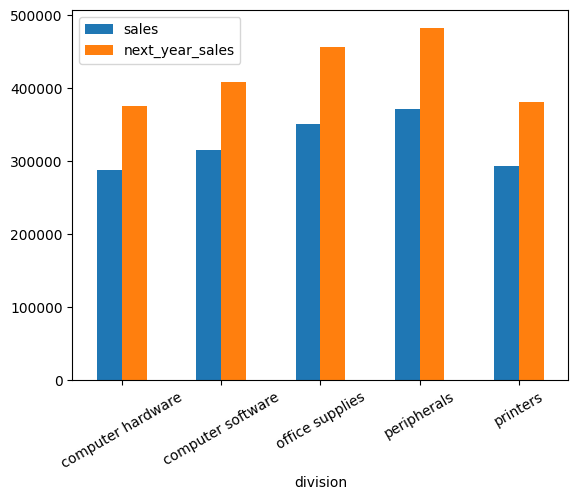

In [19]:
sales_per_division.plot(kind="bar",
                        x="division",
                        y=["sales", "next_year_sales"],
                        rot=30)


Mi van, ha összesítést akarunk látni? A halmozott paraméter segítségével az egyik oszlopot egymásra helyezhetjük, nem pedig egymás mellé, így halmozott oszlopdiagramot generálhatunk.

A halmozott oszlopdiagramok az oszlopdiagramok egy altípusa, amelyek több adatértéket jelenítenek meg egymás fölött. Lehetővé teszi több adathalmaz egyszerű összehasonlítását, és használható egy összérték összetételének bemutatására.

<Axes: xlabel='division'>

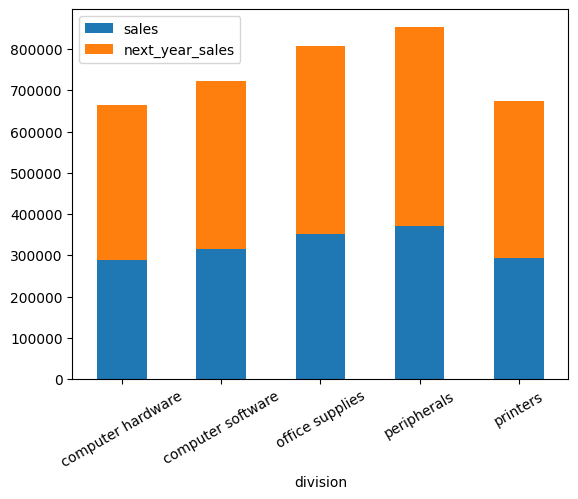

In [20]:
sales_per_division.plot(kind="bar",
                        x="division",
                        y=["sales", "next_year_sales"],
                        stacked=True,
                        rot=30)


Ez hasznos lesz a végösszegek jobb megjelenítéséhez, ha elképzelése van az egyes összegek elkészítésének módjáról.

Végül az utolsó részlet, amelyet a diagramunkhoz hozzáadunk, a Total sales és Division címke lesz az X és Y tengelyünkön. Ehhez használhatjuk az xlabelt és az ylabelt, hogy megbizonyosodjunk arról, hogy az emberek azonosítják a megjelenített adatokat.

A tengelyek címkézése segít megkülönböztetni a különböző adatkategóriákat, és felhasználható az adatok tendenciáinak vagy mintáinak kiemelésére.

<Axes: xlabel='Division', ylabel='Total sales'>

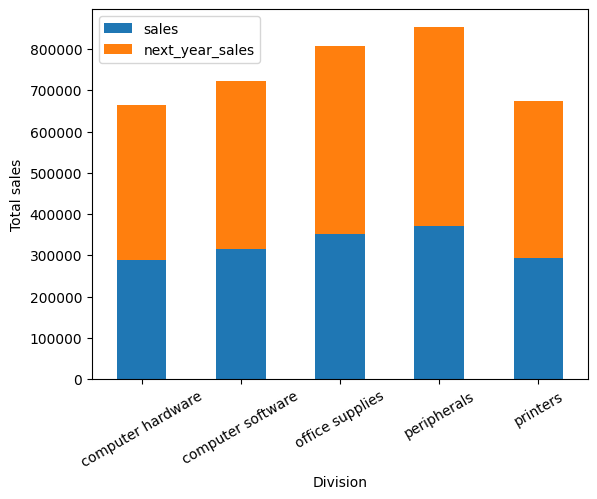

In [21]:
sales_per_division.plot(kind="bar",
                        x="division",
                        y=["sales", "next_year_sales"],
                        xlabel="Division",
                        ylabel="Total sales",
                        stacked=True,
                        rot=30)


#### Scatter plot

Ha két numerikus változót össze akarunk hasonlítani, használhatunk scatter diagramot, és használhatjuk a kind="scatter" argumentumot az ilyen típusú diagramok elkészítéséhez.

Ebben az esetben a fizetést összehasonlítjuk az eladásokkal (Több sales több fizetést reprezentál):

<Axes: xlabel='salary', ylabel='sales'>

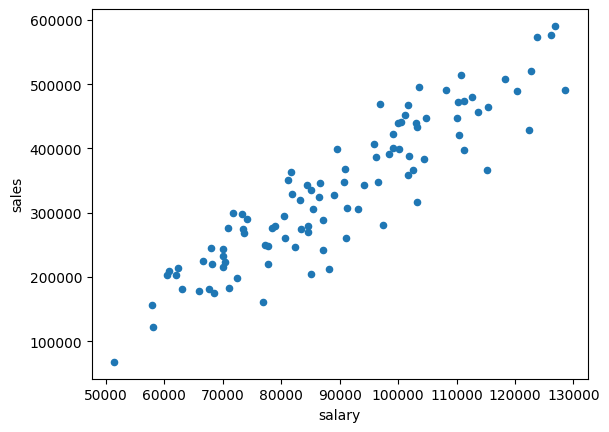

In [22]:
sales_df.plot(kind="scatter", x="salary", y="sales")


#### Hisztogram

Egy másik hasznos diagram a hisztogram, amelyet a plot() metódussal is létrehozhatunk.

    A hisztogramokat gyakran használják az adatok elosztásának főbb jellemzőinek kényelmes formában történő bemutatására.

<Axes: ylabel='Frequency'>

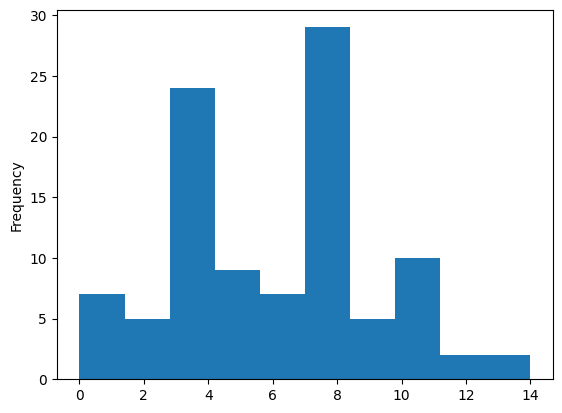

In [23]:
sales_df['work experience'].plot(kind="hist")


Hozzáadhatjuk a bins paramétert, hogy személyre szabhassuk a létrehozni kívánt rekeszek számát - vagy értéktartományát:

<Axes: ylabel='Frequency'>

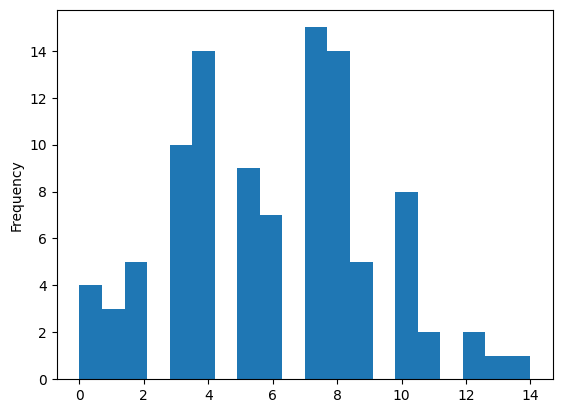

In [24]:
sales_df['work experience'].plot(kind="hist", bins=20)


KDE (Kernel Density Estimation)

A statisztikában a kernelsűrűség-becslés (KDE) egy nem paraméteres módszer egy valószínűségi változó valószínűségi sűrűségfüggvényének (PDF) becslésére. Ez a függvény Gauss-kerneleket használ, és magában foglalja az automatikus sávszélesség-meghatározást.


<Axes: ylabel='Density'>

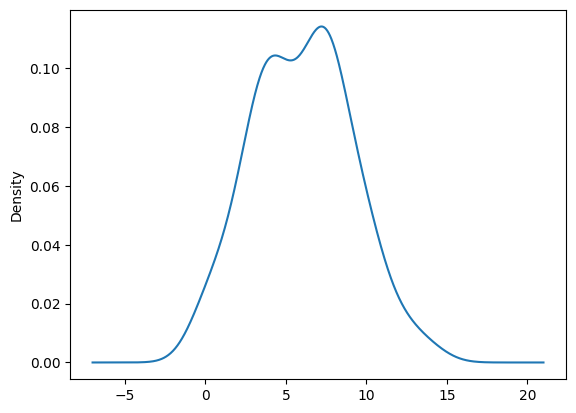

In [26]:
sales_df['work experience'].plot(kind='kde')


A hisztogram az adatok grafikus ábrázolása, amely az adatpontok gyakoriságát mutatja egy értéktartományon belül. Az adatok adott tartományon belüli eloszlásának megjelenítésére szolgál.

A KDE (Kernel Density Estimation) egy nem paraméteres módszer egy valószínűségi változó valószínűségi sűrűségfüggvényének becslésére. Arra használják, hogy megbecsüljék annak valószínűségét, hogy egy adatpont egy adott tartományba esik.

A KDE egy sima görbe, amely annak a valószínűségét ábrázolja, hogy egy adatpont egy adott tartományba esik, míg a hisztogram egy oszlopdiagram, amelyet az adott tartományon belüli adatpontok gyakoriságának ábrázolására használnak.

### Diagramtípusok 2. rész
#### Kördiagram

A kördiagramok használhatók egy egész százalékos arányának megjelenítésére, és százalékos értékeket jelenítenek meg egy meghatározott időpontban. Az oszlopdiagramoktól és a vonaldiagramoktól eltérően a kördiagramok nem mutatnak változást az idő múlásával.

A kind="pie" paraméter segítségével kördiagramokat készíthetünk:

<Axes: ylabel='count'>

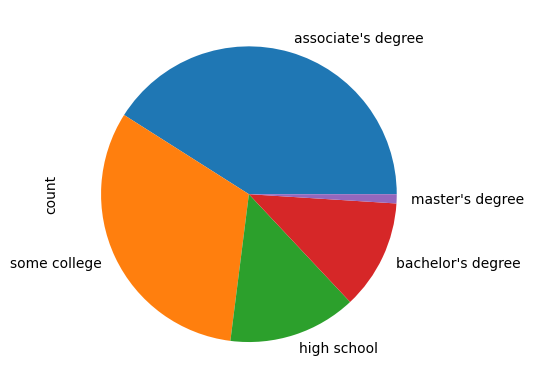

In [27]:
education_values = sales_df['level of education'].value_counts()
education_values.plot(kind="pie")


Mivel a címkék nagyobbak lehetnek, mint a tortaszeletek, a figsize paraméterrel szükség szerint testreszabhatjuk diagramunk méretét:

<Axes: ylabel='count'>

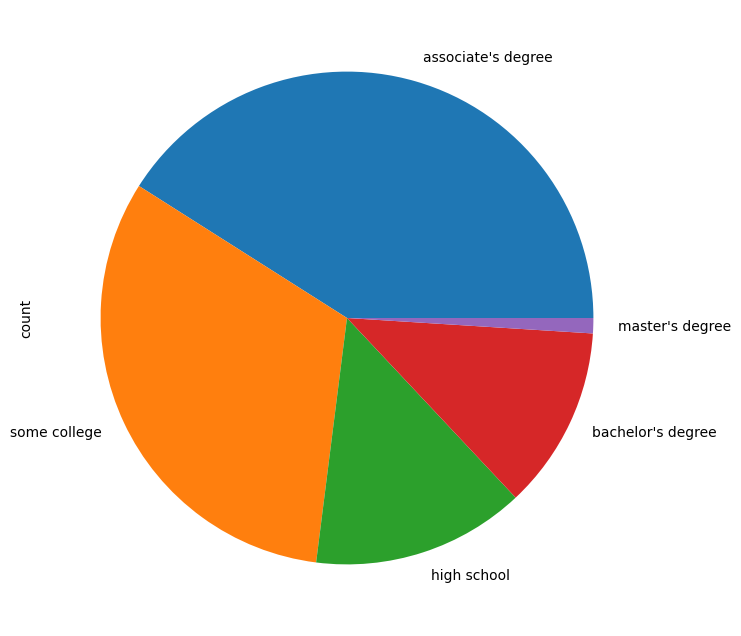

In [28]:
education_values.plot(kind="pie", figsize=(8,8))


A kördiagramunk most jobban néz ki, de érdemes tudni az egyes ékek pontos százalékos arányát. Ehhez használhatjuk a %1.2f%% értékű autopct paramétert, hogy az egyes ékek pontos százalékát két tizedesjegygel hozzáadjuk.


<Axes: ylabel='count'>

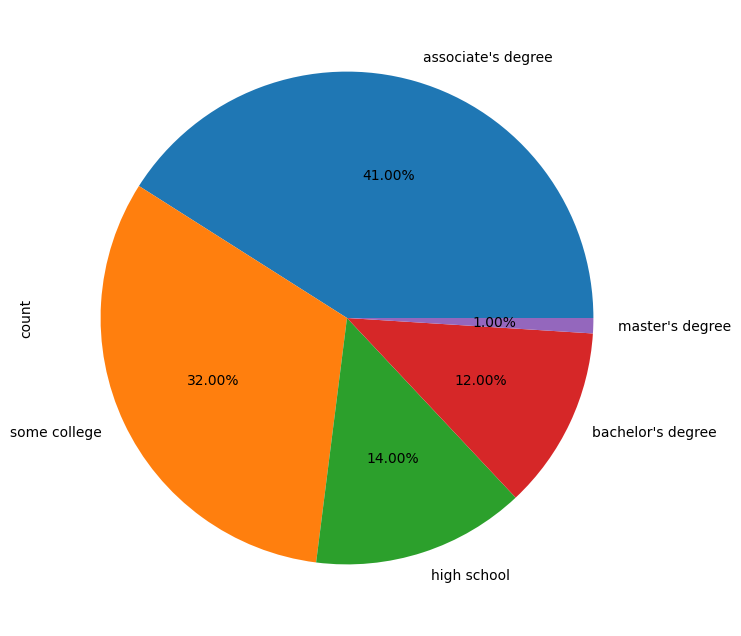

In [29]:
education_values.plot(kind="pie",
                      figsize=(8,8),
                      autopct='%1.2f%%')


#### Terület diagram

A területdiagram egy olyan diagram, amely egy vonaldiagramot és egy oszlopdiagramot egyesít, hogy egy idő után az összegek változásait mutassa. A vonaldiagramhoz hasonlítható abban, hogy az információfókuszokat ábrázolják és vonaltöredékek társítják.

Mivel sales_df adataink nem tartalmaznak dátumra vonatkozó információkat. A munkatapasztalat értékeket csoportosítjuk és szétválogatjuk, hogy szimuláljuk az időbeli fejlődést.

In [30]:
experience_values = sales_df['work experience'].value_counts()
experience_values = experience_values.sort_index()


Ezután meghívjuk a plot() metódust kind="area" paraméterrel:

<Axes: xlabel='work experience'>

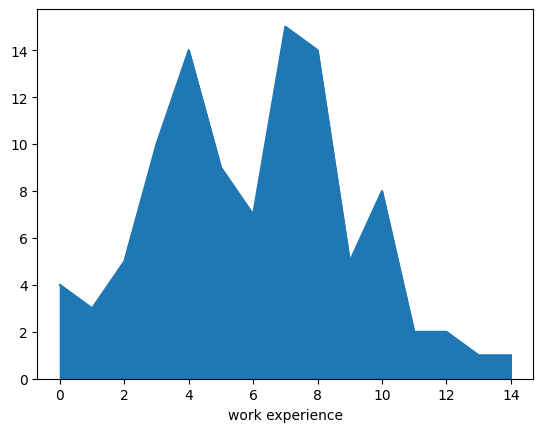

In [31]:
experience_values.plot(kind="area")


És ez még nem minden, átfedhetjük a különböző területeket is. Ehhez létrehozunk egy három oszlopos hamis DataFrame-et:

In [32]:
new_df = pd.DataFrame({
    "exp_1": experience_values,
    "exp_2": experience_values / 2,
    "exp_3": experience_values / 7,
})


És hívja meg a plot() metódust a teljes DataFrame-mel, hogy oszloponként egy területet hozzon létre:

    Ne feledje, hogy Területdiagram rajzolásához minden értéknek pozitívnak kell lennie


<Axes: xlabel='work experience'>

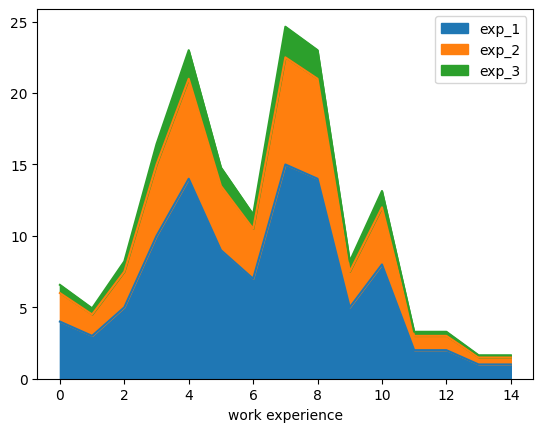

In [33]:
new_df.plot(kind="area")


#### Boxplot

A dobozdiagram az adatok grafikus ábrázolása, amely kvartiliseket használ az adatkészlet eloszlásának megjelenítésére. Egy adatkészlet mediánjának, kvartiliseinek, tartományának és kiugró értékeinek megjelenítésére szolgál.

A dobozdiagramok hasznosak a csoportok közötti eloszlások összehasonlításához, a kiugró értékek azonosításához és az adatok alakjának megértéséhez.

A plot() metódust használhatjuk ilyen típusú diagramok létrehozásához.

Ha DataFrame-et használ, az egyetlen diagramot hoz létre numerikus oszloponként egy Boxplottal:

<Axes: >

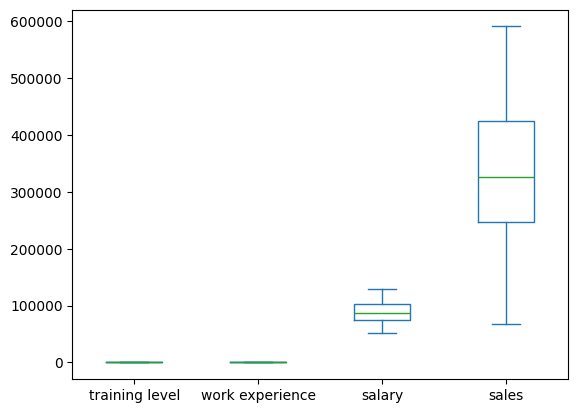

In [34]:
sales_df.plot(kind="box")


Ha egyetlen sorozata van, az egyetlen Boxplotot hoz létre:

<Axes: >

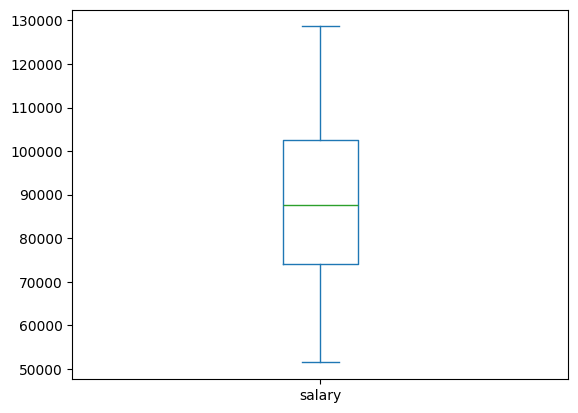

In [35]:
sales_df["salary"].plot(kind="box")


A hisztogramok és a boxplotok egyaránt hasznos eszközök az adatok eloszlásának megjelenítéséhez.

A hisztogramok egy adott tartományon belüli adatpontok gyakoriságának megjelenítésére szolgálnak. Hasznosak az eloszlás alakjának gyors megjelenítéséhez és a kiugró értékek azonosításához.

A Boxplotokat az adatkészlet mediánjának, kvartiliseinek és tartományának megjelenítésére használják. Hasznosak az adatok terjedésének és az esetleges kiugró értékek gyors azonosításához.

A hisztogramok és a boxplotok egyaránt használhatók a különböző adatkészletek összehasonlítására és az adatok mintáinak azonosítására.

### Extra testreszabások

Tudjuk, hogyan kell használni a plot() metódust és annak diagramváltozatait, de ez nem biztos, hogy elegendő, ha hatékonyan szeretné közölni a diagram meglátásait.

Testreszabhatja a diagramokat, hogy jobban kommunikálhassa adatait és betekintéseit. Segíthet abban is, hogy cselekményét vizuálisan vonzóbbá tegye, ami megkönnyítheti az értelmezést.

A cselekmény testreszabása abban is segíthet, hogy adatait szélesebb közönség számára hozzáférhetőbbé tegye.

Készítsünk egy alap hisztogramot, és szabjuk testre:


<Axes: ylabel='Frequency'>

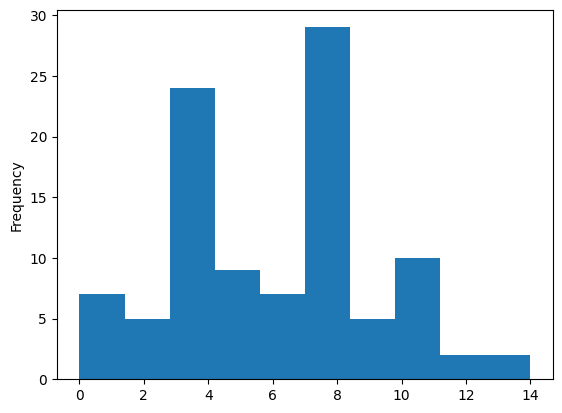

In [36]:
sales_df['work experience'].plot(kind="hist")


#### Colors

Az első dolog, amit tehetünk, hogy megfelelő színeket adunk hozzá a színek paraméterrel:

<Axes: ylabel='Frequency'>

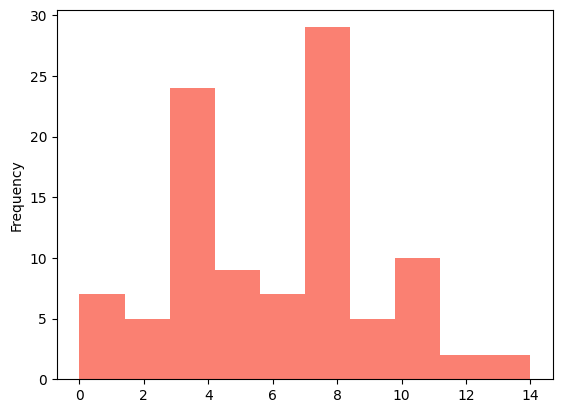

In [37]:
sales_df['work experience'].plot(kind="hist",
                                 color="salmon")


#### Diagram címe

Ezután a cselekmény címének hozzáadása segít a cselekmény azonosításában, és kontextust biztosít a bemutatott adatok megértéséhez.

A címek azt is megkönnyítik a nézők számára, hogy gyorsan megértsék a cselekmény célját és a megjelenített adatokat.

Címek hozzáadásához használhatjuk a title paramétert:


<Axes: title={'center': 'Histogram of Work experience'}, ylabel='Frequency'>

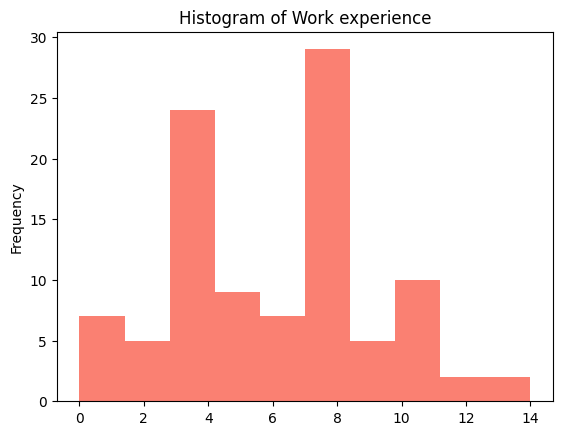

In [38]:
sales_df['work experience'].plot(kind="hist",
                                 color="salmon",
                                 title="Histogram of Work experience")


#### Diagram mérete

A megfelelő méret használata a parcellában néhány okból is fontos.

Először is biztosítja, hogy a diagram olvasható legyen, és hogy minden adat látható legyen. Másodszor, biztosítja a diagram megfelelő méretezését, hogy az adatok pontosan legyenek ábrázolva. Végül pedig gondoskodik arról, hogy a cselekmény esztétikusan nézzen ki és könnyen értelmezhető legyen.

A figsize paraméter használható a telek méretének megváltoztatására:

<Axes: title={'center': 'Histogram of Work experience'}, ylabel='Frequency'>

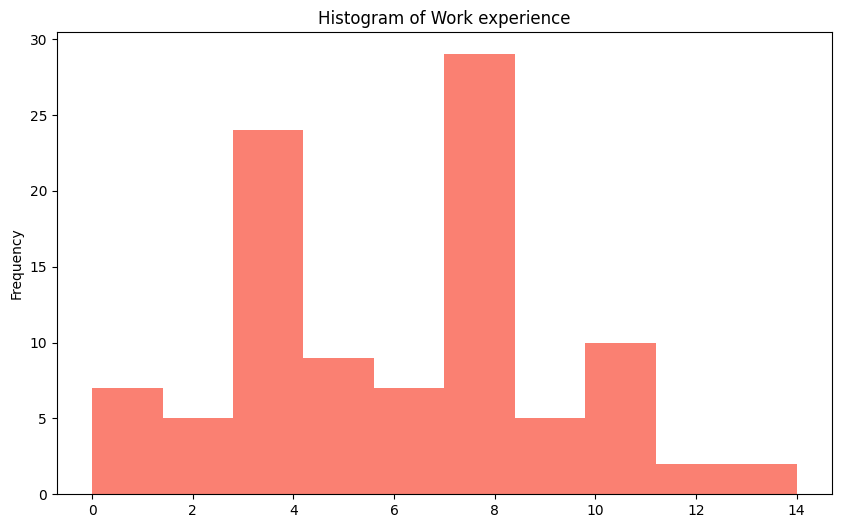

In [39]:
sales_df['work experience'].plot(kind="hist",
                                 color="salmon",
                                 figsize=(10,6),
                                 title="Histogram of Work experience")


#### Legends

A legendák hasznosak abban, hogy további kontextust biztosítsanak a cselekményhez, és segítsenek a nézőnek megérteni, mit ábrázol a cselekmény. Használhatók különböző adatsorok azonosítására, mértékegységek feltüntetésére, vagy egyéb hasznos információkkal szolgálhatnak.

Jelen esetben egyetlen sorozatunk van - több éves munkatapasztalat-, szóval tegyünk hozzá egy legendát ezzel a címmel.

Először is meg kell határoznunk a címkeparamétert azzal a szöveggel, amelyet a jelmagyarázatok mezőben szeretnénk megjeleníteni. Ezután implicit módon hívja meg a plt.legend() metódust a jelmagyarázat mező létrehozásához.

     A plt.legend() egy metódushívás közvetlenül a matplotlib könyvtárából, amely alatta pandákban a diagramjainkat generálja.

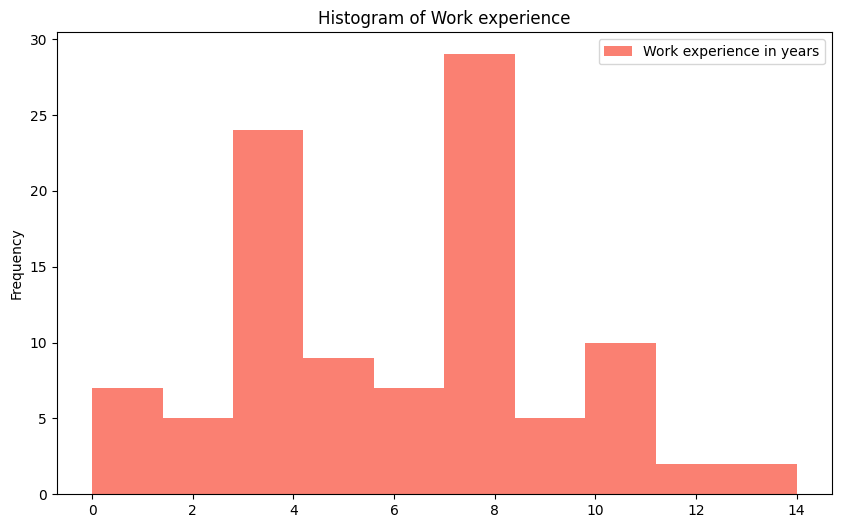

In [41]:
import matplotlib.pyplot as plt
sales_df['work experience'].plot(kind="hist",
                                 color="salmon",
                                 figsize=(10,6),
                                 label="Work experience in years",
                                 title="Histogram of Work experience")

plt.legend()


#### Rácsvonalak

A rácsvonalak segítségével a diagram nézője könnyebben azonosíthatja az adatpontokat, és jobban megértheti a köztük lévő kapcsolatokat.

A rácsvonalak bizonyos adatpontok kiemelésére vagy az adatok trendjeinek kiemelésére is használhatók.

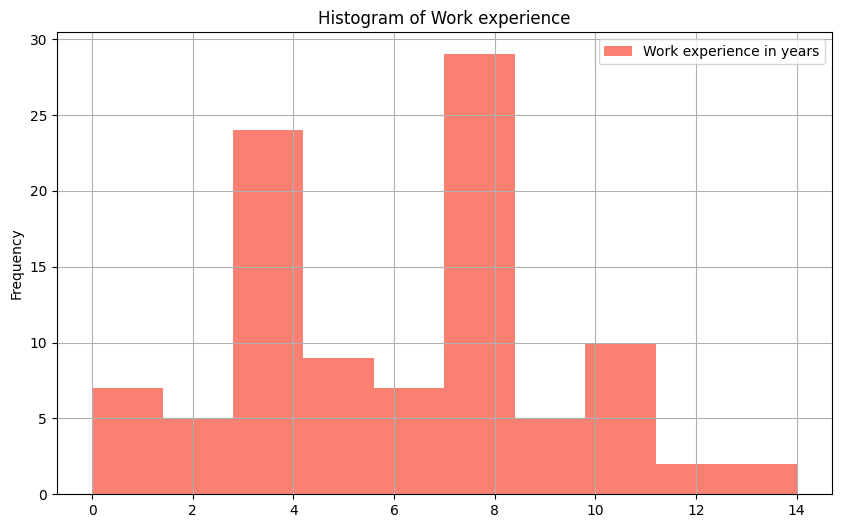

In [42]:
sales_df['work experience'].plot(kind="hist",
                                 color="salmon",
                                 figsize=(10,6),
                                 grid=True,
                                 label="Work experience in years",
                                 title="Histogram of Work experience")

plt.legend()


#### Címkék betűmérete

A diagramon a betűméret megváltoztatása segíthet abban, hogy a szöveg olvasható legyen, amikor a diagramot kinyomtatják vagy megjelenítik különböző eszközökön.

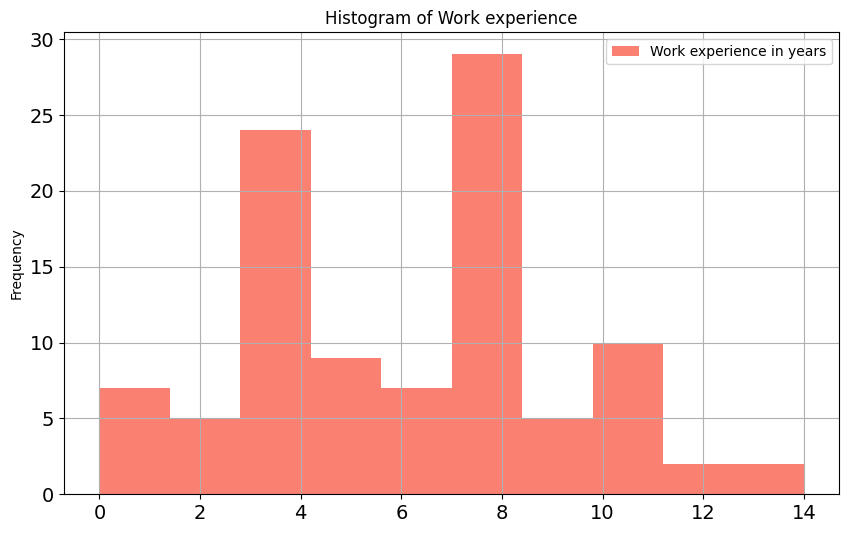

In [43]:
sales_df['work experience'].plot(kind="hist",
                                 color="salmon",
                                 figsize=(10,6),
                                 grid=True,
                                 fontsize=14,
                                 label="Work experience in years",
                                 title="Histogram of Work experience")

plt.legend()


#### A diagramom exportálása

A diagram exportálása hasznos a diagram másokkal való megosztásához vagy a diagram archiválásához későbbi felhasználás céljából.

Diagramunk exportálásához először el kell tárolnia azt egy változóban. Ebben az esetben a diagramunkat a my_chart változóban tároljuk:

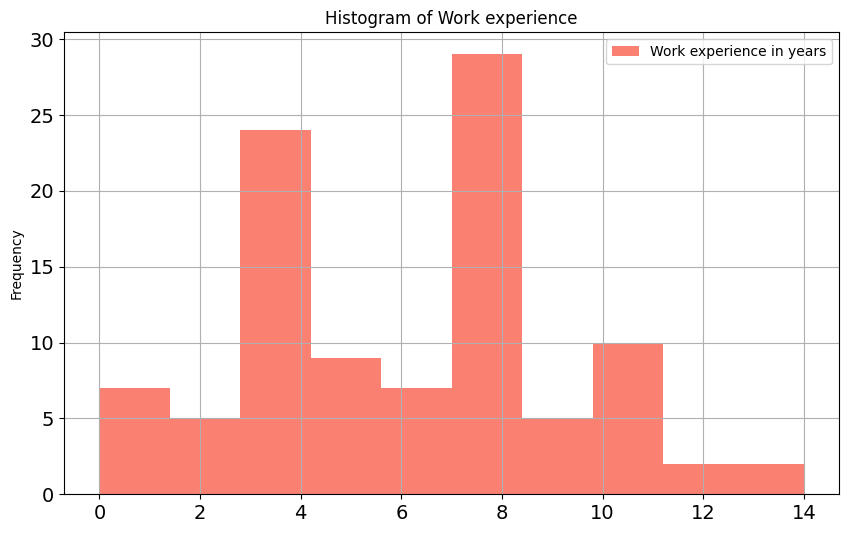

In [44]:
my_chart = sales_df['work experience'].plot(kind="hist",
                                            color="salmon",
                                            figsize=(10,6),
                                            grid=True,
                                            fontsize=14,
                                            label="Work experience in years",
                                            title="Histogram of Work experience")

plt.legend()


Most meghívhatjuk a savefig() metódust a diagram exportálásához, és első argumentumként a kívánt kimenet nevét adjuk át. Ehhez a my-chart.png-t fogjuk használni:


In [ ]:
my_chart.figure.savefig("my-chart.png")

# an alternative way
my_chart.figure.savefig("my-chart", format="png")


Az exportált fájl alapértelmezett formátuma PNG lesz, de ezt a format paraméterrel módosíthatja. Számos támogatott formátum létezik, például PNG, PDF és SVG.

In [ ]:
my_chart.figure.savefig("my-chart.svg")

# an alternative way
my_chart.figure.savefig("my-chart", format="svg")


A diagramok exportálásának másik módja, ha egyszerűen kattintson a jobb gombbal a kívánt diagramra, és válassza a Kép mentése másként... lehetőséget.